In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("data.csv")

In [3]:
df.dropna(inplace=True)


In [4]:
df.drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan"], axis=1, inplace=True)


In [5]:
df1 = pd.get_dummies(df)


In [6]:
df1.drop(["Occupation_Writer", "Credit_Mix_Standard", "Payment_of_Min_Amount_NM",
          "Payment_Behaviour_Low_spent_Small_value_payments", "Credit_Score_Standard"], axis=1, inplace=True)


In [7]:
# Split data into dependent and independent variables
dep = df1["Monthly_Balance"]
ind = df1.drop(["Monthly_Balance"], axis=1)

In [8]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(ind, dep, train_size=0.75)


In [9]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
r2 = r2_score(y_test, pred)

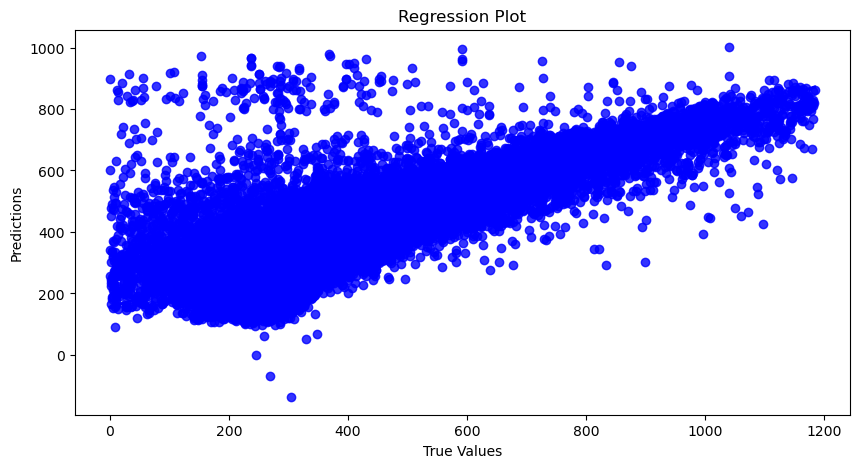

In [11]:
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=pred, color="blue")
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Plot')
plt.savefig('linear_regression_plot.png')  # Save the plot as an image


In [12]:

print("The value of R-Square is", round(r2, 4))
rmse = mean_squared_error(y_test, pred, squared=False)
print("Root Mean Squared Error:", rmse)

The value of R-Square is 0.6033
Root Mean Squared Error: 127.25911243786906


In [33]:
df2


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,1
1,2,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,1
2,3,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,1
3,4,23,Scientist,19114.12,1824.843333,3,4,3,4,5,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,1
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,3
99996,5,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,3
99997,6,25,Mechanic,39628.99,3359.415833,4,6,7,2,27,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,3
99998,7,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,2


In [37]:

df2=df
df2.drop(["Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"],axis=1,inplace=True)
df2["Credit_Score"].replace({"Good":1,"Standard":2,"Poor":3},inplace=True)
df2=pd.get_dummies(df2)
df2.head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,809.98,26.822620,265,49.574949,21.46538,312.494089,1
1,2,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,4,809.98,31.944960,266,49.574949,21.46538,284.629163,1
2,3,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,809.98,28.609352,267,49.574949,21.46538,331.209863,1
3,4,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,4,809.98,31.377862,268,49.574949,21.46538,223.451310,1
4,5,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,4,809.98,24.797347,269,49.574949,21.46538,341.489231,1


In [38]:
# Assuming 'Credit_Score' is the target variable for logistic regression
dep_var_logistic = df2["Credit_Score"]
ind_var_logistic = df2.drop(["Credit_Score"], axis=1)


In [39]:
# Split data into training and testing sets for logistic regression
x_train_logistic, x_test_logistic, y_train_logistic, y_test_logistic = train_test_split(ind_var_logistic, dep_var_logistic, train_size=0.75)



In [40]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train_logistic, y_train_logistic)
pred_logistic = logistic_model.predict(x_test_logistic)


D:\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Evaluate Logistic Regression
matrix_logistic = confusion_matrix(y_test_logistic, pred_logistic)
score_logistic = accuracy_score(y_test_logistic, pred_logistic)
report_logistic = classification_report(y_test_logistic, pred_logistic)


In [42]:
# Print and save Logistic Regression evaluation
print("The model accuracy score is %.4f" % score_logistic)
print("The confusion matrix is given as follows:\n")
print(matrix_logistic)
print("The classification report is:\n")
print(report_logistic)


The model accuracy score is 0.5441
The confusion matrix is given as follows:

[[  219  4144    79]
 [  265 10937  2089]
 [   41  4780  2446]]
The classification report is:

              precision    recall  f1-score   support

           1       0.42      0.05      0.09      4442
           2       0.55      0.82      0.66     13291
           3       0.53      0.34      0.41      7267

    accuracy                           0.54     25000
   macro avg       0.50      0.40      0.39     25000
weighted avg       0.52      0.54      0.49     25000



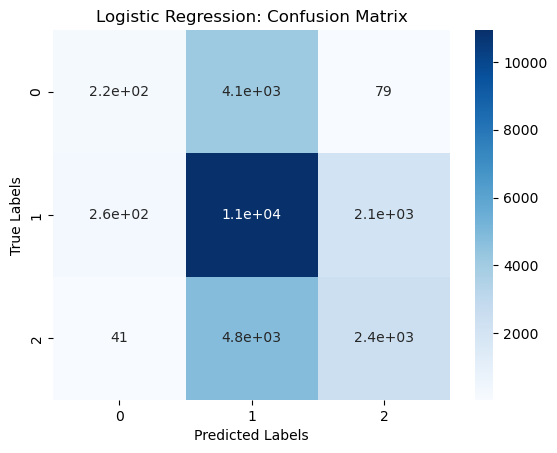

In [43]:
# Save the confusion matrix plot
plt.figure()
sns.heatmap(matrix_logistic, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression: Confusion Matrix')
plt.savefig('logistic_regression_confusion_matrix.png')